In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as smt

In [2]:
#importing dataset
dataset = pd.read_csv('sign_mnist.csv')

#displaying first 5 rows of the dataset
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
#shape of dataset (number of rows and columns present where each row is an example of )
dataset.shape

(27455, 785)

In [4]:
#seperating features columns from dataset
features = pd.DataFrame(data = dataset.drop(axis=1, columns='label'))
features.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Text(0.5,1,'Distribution of Classes')

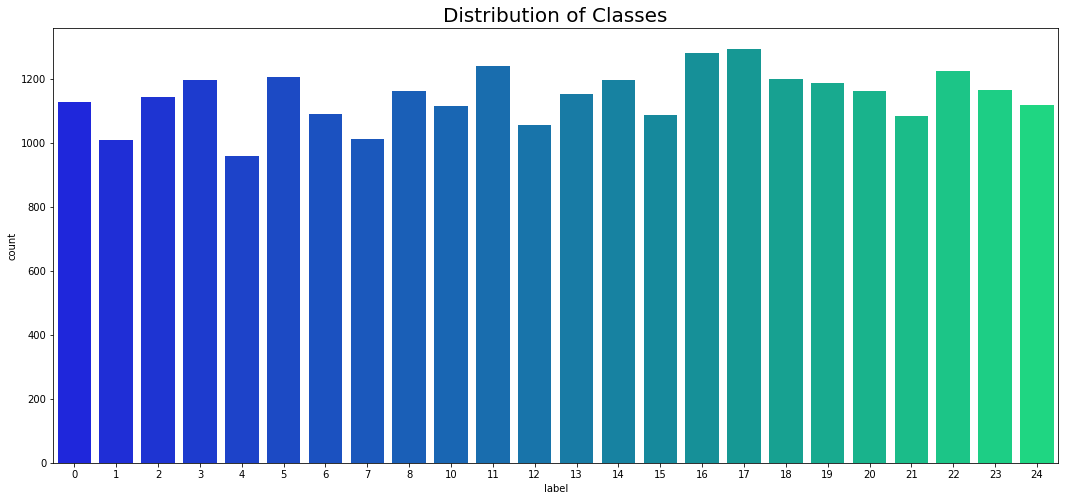

In [5]:
#extracting target column from dataset
target = dataset['label']

#visualising balance amoung the classes
plt.figure(figsize=(18,8))
sns.countplot(x=target,palette='winter')
plt.title('Distribution of Classes',size=20)

### The above graph show that the class distribution in the provided dataset is approximately equal.

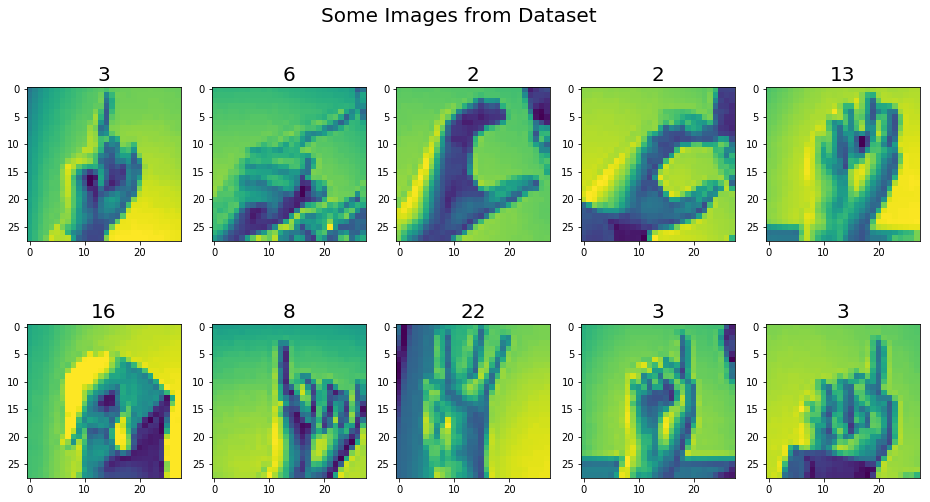

In [6]:
#visualizing a sample from the dataset
fig=plt.figure(figsize=(16,8))
i=1
j=0
fig.suptitle("Some Images from Dataset",size=20)
for row in features.iterrows():
    img=np.array(row[1]).reshape(28,28)
    ax=plt.subplot(2,5,i)
    ax.set_title(target[j],fontsize=20)
    ax.imshow(img)
    i+=1
    j+=1
    if i==11:
        break

In [7]:
#creating empty lists to further store model name and it's accuracy in 'model' and 'acc' respectively
model = list()
acc = list()

In [8]:
from sklearn.model_selection import train_test_split

#splitting dataset into training data and testing data respectively
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.33, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

#model 1 ----> Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_y = tree.predict(x_test)

#storing model name and it's accuracy
model.append('Decision Tree Classifier')
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

Accuracy Score :  0.8654673877055513


In [10]:
print("Classification Report for Decision Tree Classifier: \n",smt.classification_report(y_test,pred_y))

Classification Report for Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       354
           1       0.82      0.89      0.85       302
           2       0.93      0.95      0.94       378
           3       0.88      0.89      0.88       407
           4       0.83      0.78      0.81       320
           5       0.90      0.88      0.89       407
           6       0.90      0.89      0.89       348
           7       0.85      0.87      0.86       339
           8       0.82      0.82      0.82       392
          10       0.86      0.83      0.85       373
          11       0.88      0.88      0.88       424
          12       0.79      0.86      0.82       362
          13       0.85      0.84      0.84       377
          14       0.94      0.91      0.92       400
          15       0.87      0.91      0.89       349
          16       0.93      0.92      0.93       436
          17       0.84    

In [11]:
from sklearn.ensemble import RandomForestClassifier

#model 2 ----> Random Forest Classifier (Entropy)
ranfor = RandomForestClassifier(criterion='entropy')
ranfor.fit(x_train,y_train)
pred_y = ranfor.predict(x_test)

#storing model name and it's accuracy
model.append("Random Forest Classifier (Entropy)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score :  0.9750579406246551


In [12]:
print("Classification Report for Random Forest Classifier (Entropy): \n",smt.classification_report(y_test,pred_y))

Classification Report for Random Forest Classifier (Entropy): 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       354
           1       0.94      0.99      0.96       302
           2       1.00      0.99      1.00       378
           3       0.98      0.99      0.98       407
           4       0.97      0.97      0.97       320
           5       0.97      1.00      0.98       407
           6       0.98      0.98      0.98       348
           7       0.98      0.97      0.98       339
           8       0.96      0.96      0.96       392
          10       0.97      0.98      0.98       373
          11       0.99      0.99      0.99       424
          12       0.96      0.95      0.96       362
          13       0.98      0.95      0.96       377
          14       0.99      0.98      0.99       400
          15       0.99      0.99      0.99       349
          16       0.99      1.00      0.99       436
          17     

In [13]:
#model 3 ----> Random Forest Classifier (gini)
ranfor = RandomForestClassifier(criterion='gini')
ranfor.fit(x_train,y_train)
pred_y = ranfor.predict(x_test)

#storing model name and it's accuracy
model.append("Random Forest Classifier (Gini)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score :  0.9729610418276129


In [14]:
print("Classification Report for Random Forest Classifier (Gini) : \n",smt.classification_report(y_test,pred_y))

Classification Report for Random Forest Classifier (Gini) : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       354
           1       0.95      0.98      0.96       302
           2       0.99      1.00      0.99       378
           3       0.99      0.98      0.99       407
           4       0.97      0.98      0.97       320
           5       0.98      0.99      0.99       407
           6       0.97      0.97      0.97       348
           7       0.97      0.98      0.97       339
           8       0.95      0.95      0.95       392
          10       0.96      0.98      0.97       373
          11       0.99      0.98      0.99       424
          12       0.94      0.96      0.95       362
          13       0.96      0.96      0.96       377
          14       0.99      0.98      0.99       400
          15       0.97      1.00      0.99       349
          16       0.99      0.99      0.99       436
          17       

In [15]:
#applying PCA before training with SVC
from sklearn.decomposition import PCA

#reducing features from 784 to 200 features
pca = PCA(n_components=200)
pca.fit(features)
x_new = pca.transform(features)
x_new.shape

(27455, 200)

In [16]:
#splitting dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x_new,target, test_size=0.33, random_state=42)

In [17]:
from sklearn.svm import SVC

In [18]:
#model 4 ----> SVM (linear)
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
pred_y = svc.predict(x_test)

#storing model name and it's accuracy
model.append("SVM (Linear)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("SVM when Kernel = 'LINEAR':-\n")
print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

SVM when Kernel = 'LINEAR':-

Accuracy Score :  1.0


In [19]:
print("Classification Report for SVM (linear) : \n",smt.classification_report(y_test,pred_y))

Classification Report for SVM (linear) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       302
           2       1.00      1.00      1.00       378
           3       1.00      1.00      1.00       407
           4       1.00      1.00      1.00       320
           5       1.00      1.00      1.00       407
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       339
           8       1.00      1.00      1.00       392
          10       1.00      1.00      1.00       373
          11       1.00      1.00      1.00       424
          12       1.00      1.00      1.00       362
          13       1.00      1.00      1.00       377
          14       1.00      1.00      1.00       400
          15       1.00      1.00      1.00       349
          16       1.00      1.00      1.00       436
          17       1.00      1.00     

In [20]:
#model 5 ----> SVM (gaussian)
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
pred_y = svc.predict(x_test)

model.append("SVM (Gaussian)")
acc.append(smt.accuracy_score(y_test,pred_y)*100)

print("SVM when Kernel = 'GAUSSIAN':-\n")
print("Accuracy Score : ",smt.accuracy_score(y_test,pred_y))

/home/kritika/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM when Kernel = 'GAUSSIAN':-

Accuracy Score :  0.15859176691314425


In [21]:
print("Classification Report for SVM (gaussian) : \n",smt.classification_report(y_test,pred_y))

Classification Report for SVM (gaussian) : 
               precision    recall  f1-score   support

           0       1.00      0.09      0.16       354
           1       1.00      0.08      0.15       302
           2       1.00      0.13      0.23       378
           3       1.00      0.13      0.22       407
           4       1.00      0.08      0.15       320
           5       1.00      0.09      0.17       407
           6       1.00      0.17      0.29       348
           7       1.00      0.12      0.21       339
           8       1.00      0.11      0.20       392
          10       1.00      0.10      0.18       373
          11       1.00      0.14      0.25       424
          12       1.00      0.07      0.13       362
          13       1.00      0.12      0.22       377
          14       1.00      0.11      0.20       400
          15       1.00      0.14      0.25       349
          16       1.00      0.16      0.28       436
          17       0.05      1.00   

In [22]:
#list of models and their accuracies
model_acc =pd.DataFrame(data=list(zip(model,acc)),columns=('Models','Accuracy'))
model_acc

,Models,Accuracy
0,Decision Tree Classifier,86.546739
1,Random Forest Classifier (Entropy),97.505794
2,Random Forest Classifier (Gini),97.296104
3,SVM (Linear),100.000000
4,SVM (Gaussian),15.859177


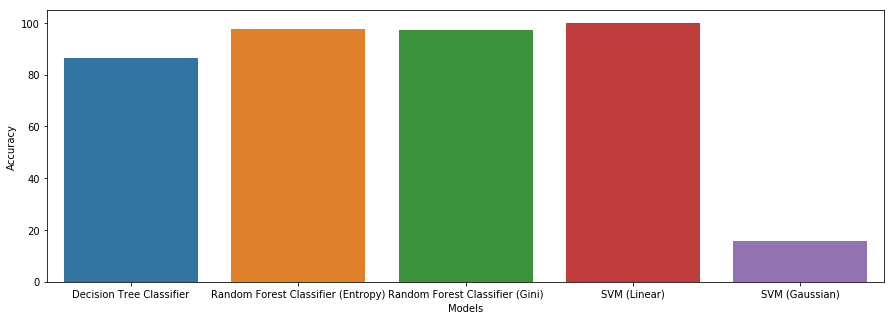

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=model_acc,x='Models',y='Accuracy')

# Conclusion : 
By analysing the above graph, it is clear that SVM(linear) helps in attaining the maximum accuracy of 100% for the given dataset